# 2022-04-14 Finer-grid deterministic fits for two model variants

Results below are for commit: ### 

(Rerunning the code below for other commits is not likely/guaranteed to give the same results.)

For simplicity I am doing this on a branch that I don't plan on merging into the the master branch - to allow me to just temporarily modify the existing `do_1...` script.

I am testing the base model and `oBEvoAI` with a finer grid - same parameter ranges but 30 instead of 10 values per parameter:

    N_GRID_SIDE = 30
    PARAM_ARRAYS['k_c'] = np.logspace(np.log10(0.2), np.log10(2), N_GRID_SIDE)
    PARAM_ARRAYS['k_sc'] = np.logspace(np.log10(0.02), np.log10(0.2), N_GRID_SIDE)
    PARAM_ARRAYS['thetaDot_1'] = np.logspace(np.log10(0.001), np.log10(0.1), N_GRID_SIDE) 
    PARAM_ARRAYS['T_delta'] = np.logspace(np.log10(10), np.log10(100), N_GRID_SIDE)
    PARAM_ARRAYS['beta_V'] = np.logspace(np.log10(1), np.log10(200), N_GRID_SIDE)
    PARAM_ARRAYS['T_Of'] = np.logspace(np.log10(0.5), np.log10(10), N_GRID_SIDE)
    PARAM_ARRAYS['sigma_O'] = np.logspace(np.log10(0.02), np.log10(2), N_GRID_SIDE)

The results below show that with this finer grid, these model variants are still uncapable of priority assertion and short-stopping. And I am also confirming below that the few parameterisations which achieve some gap acceptance hesitation do so by staying very uncertain about the other agent's behaviour, by setting $\beta_V$ to its minimal searched value of 1. I am also just verifying that reducing it even further gets the model even closer to 50/50 uncertainty.

['C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oBEvoAI.pkl']

Loading parameter search from file "C:\GITHUB\COMMOTIONSFramework\SCPaper/results\DetFit_.pkl"...
	Done.
Analysing model , 900 parameterisations...
	Main criteria:
		Priority assertion: Found 0 (0.0 %) parameterisations.
		Short-stopping: Found 0 (0.0 %) parameterisations.
		Yield acceptance hesitation: Found 840 (93.3 %) parameterisations.
		Early yield acceptance: Found 900 (100.0 %) parameterisations.
	Secondary criteria:
		Gap acceptance hesitation: Found 0 (0.0 %) parameterisations.
		Pedestrian progressing after vehicle yield: Found 900 (100.0 %) parameterisations.
	All main criteria met: Found 0 (0.0 %) parameterisations.
	Max no of main criteria met was 2, for 840 parameterisations.
		Out of these, the max number of secondary criteria met was 1, for 840 parameterisations.
	NaNs in main crit: [0 0 0 0]; sec crit: [0 0]

Loading parameter sear

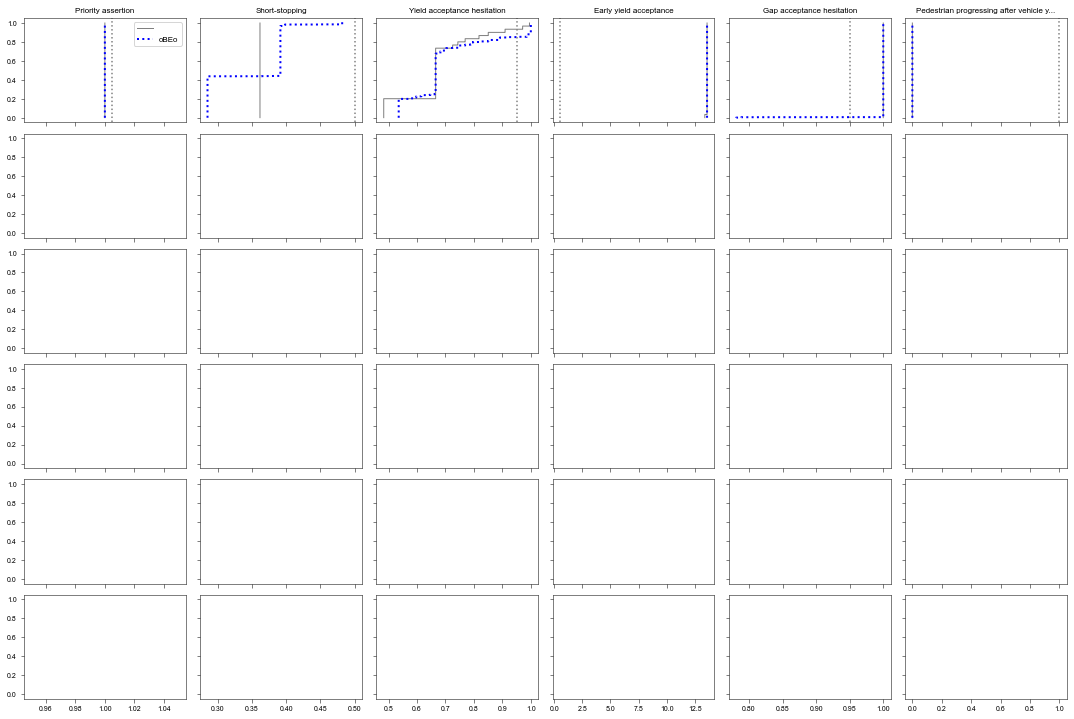



*** Retained models (having at least one parameterisation meeting all main criteria) ***
Saving "C:\GITHUB\COMMOTIONSFramework\SCPaper/results/RetainedDetModels.pkl"...
	Done.


In [1]:
%run ../SCPaper/do_2_analyse_deterministic_fits

['C:\\GITHUB\\COMMOTIONSFramework\\diary notebooks', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\python39.zip', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\DLLs', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64', '', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\win32', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\win32\\lib', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\Pythonwin', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\tragma\\.ipython', 'C:\\GITHUB\\COMMOTIONSFramework', 'C:\\GITHUB\\COMMOTIONSFramework/SCPaper']

Parameterisations achieving maximum gap acceptance hesitation:
('k_c', 'k_sc', 'beta_V')
[[1.84734171 0.02       1.        ]
 [1.84734171 0.02165273 1.        ]
 [1.84734171 0.02344205 1.        ]
 [1.84734171 0.0253

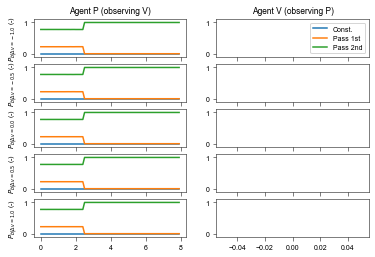

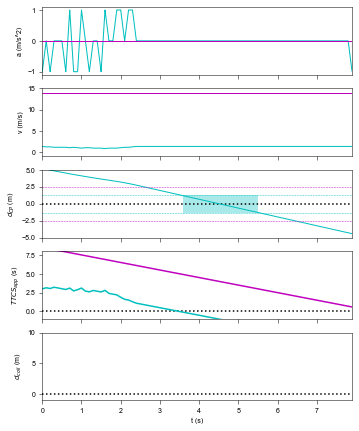


{'k_c': 1.8473417143747723, 'k_sc': 0.020000000000000004, 'beta_V': 0.1}


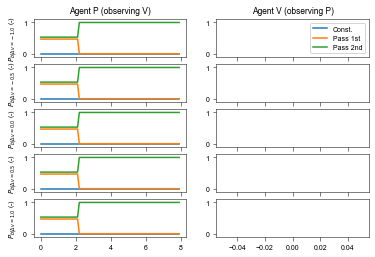

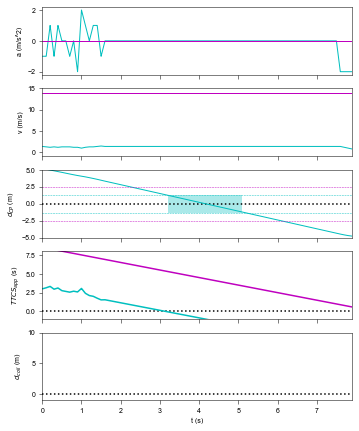

In [23]:
# append root folder of repo to PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
parent_path = str(Path('.').absolute().parent)
for add_path in (parent_path, parent_path + '/SCPaper'):
    if not (add_path in sys.path):
        sys.path.append(add_path)
print(sys.path)

import sc_fitting
from do_2_analyse_deterministic_fits import get_best_parameterisations_for_crit, get_best_scen_var_for_paramet

MODEL_NAME = 'oBEvoAI'
SCENARIO_NAME = 'PedHesitateVehConst'
det_fit = det_fits[MODEL_NAME]
idxs_best = get_best_parameterisations_for_crit(det_fit, 'Gap acceptance hesitation')
print('\nParameterisations achieving maximum gap acceptance hesitation:')
print(det_fit.param_names)
print(det_fit.results.params_matrix[idxs_best, :])
idx_best = idxs_best[0]
print('\nDeciding which scenario variant to run...')
i_var = get_best_scen_var_for_paramet(det_fit, idx_best, SCENARIO_NAME)
params_array = det_fit.results.params_matrix[idx_best, :]
params_dict = det_fit.get_params_dict(params_array)
print('\nSimulating...')
for set_lower_beta_V in (False, True):
    print()
    if set_lower_beta_V:
        params_dict['beta_V'] = 0.1
    print(params_dict)
    sim = sc_fitting.construct_model_and_simulate_scenario(MODEL_NAME, params_dict, sc_fitting.ONE_AG_SCENARIOS[SCENARIO_NAME], i_variation=i_var,
                                                        zero_acc_after_exit=False, apply_stop_criteria=False)
    sim.do_plots(kinem_states=True, beh_probs=True)